In [ ]:
## In den Gruppen:

# generiert ihr einen mehrdimensionalen Datensatz (mit mehreren) Clustern mit Hilfe der Verteilungsfunktionen

# versucht die Daten mit K-Means in die konstruierten Cluster aufzuteilen

# manipuliert die Daten und konstruiert Fälle in denen das Clustering nicht mehr wie gewünscht funktioniert (Daten skalieren, falsche Cluster Anzahl, vorgegebene Intialisierung,...)

In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM

In [2]:
#erste Punktwolke
X_wert = np.random.normal (0,1,1000)
Y_wert = np.random.normal (0,1,1000)
#zweite Punktwolke
X2_wert = np.random.normal (3,2,1000)
Y2_wert = np.random.normal (3,2,1000)
#dritte Punktwolke
X3_wert = np.random.normal (-3,1,1000)
Y3_wert = np.random.normal (-3,1,1000)

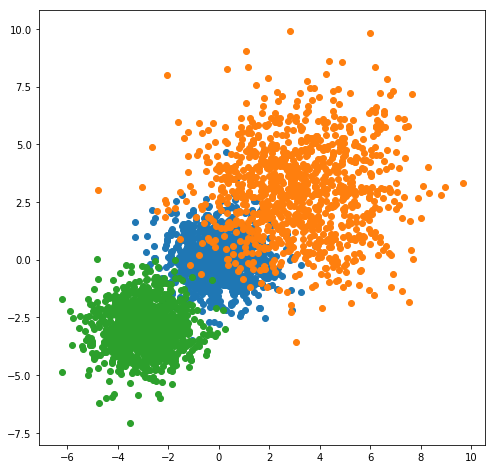

In [3]:
#Visualisierung der Punktwolken
plt.figure (1,figsize=(8,8))
plt.scatter(X_wert,Y_wert)
plt.scatter(X2_wert,Y2_wert)
plt.scatter(X3_wert,Y3_wert)

In [13]:
#erstelle einen zusammengesetzten Datensatz (notwendig für kmean)
data_x = np.concatenate([X_wert,X2_wert,X3_wert])
data_y = np.concatenate([Y_wert,Y2_wert,Y3_wert])
model_data =pd.DataFrame()
model_data["data_x"] = data_x
model_data["data_y"] = data_y
dataset =pd.DataFrame()
dataset["data_x"] = data_x
dataset["data_y"] = data_y

In [14]:
clusters = 5 # Angabe der Cluster

# K-means Clustering 

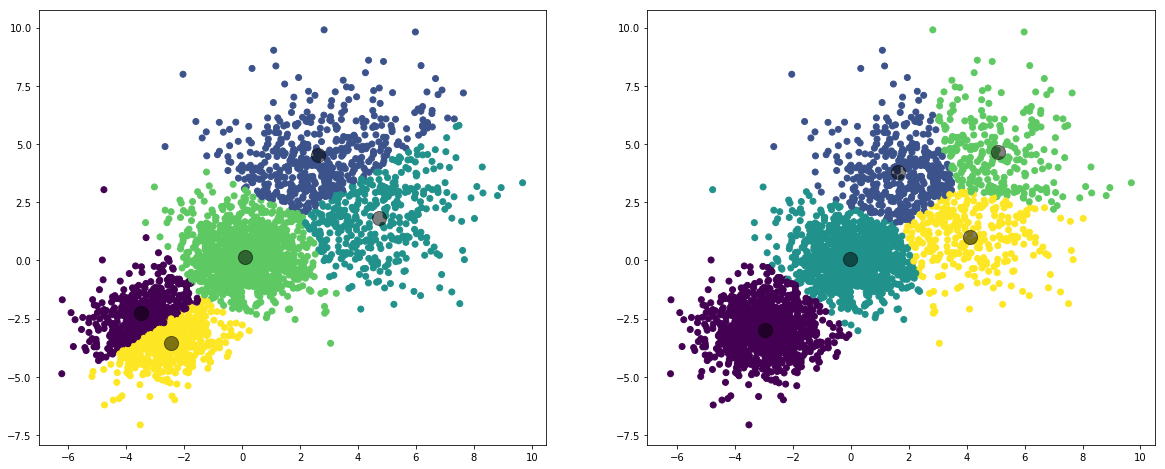

In [16]:
#Anpassung der Versuche 
K = KMeans(n_clusters=clusters,n_init=1).fit(model_data)
dataset["clusternumber"]=K.predict(model_data)
K2 = KMeans(n_clusters=clusters,n_init=10).fit(model_data)
dataset["clusternumber2"]=K2.predict(model_data)
centersK = K.cluster_centers_
centersK2 = K2.cluster_centers_

plt.figure (1,figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter (data_x,data_y,c=K.labels_)
plt.scatter(centersK[:,0], centersK[:,1], c='black', s=200, alpha=0.5);

plt.subplot(1,2,2)
plt.scatter (data_x,data_y,c=K2.labels_)
plt.scatter(centersK2[:,0], centersK2[:,1], c='black', s=200, alpha=0.5);

In [17]:
dataset.head()

,data_x,data_y,clusternumber,clusternumber2
0,-1.192130,0.384067,3,2
1,0.209969,-0.932154,3,2
2,-0.402845,-1.416874,3,2
3,0.583390,0.969857,3,2
4,0.566972,1.353123,3,2


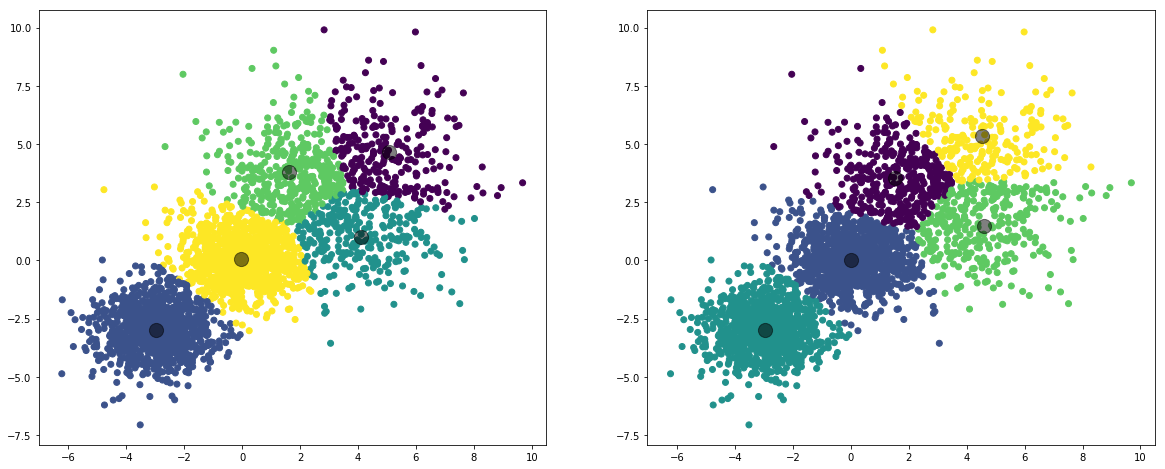

In [18]:
#Anpassung der Startwerte (noch nicht passiert)
K3 = KMeans(n_clusters=clusters,n_init=1).fit(model_data)
dataset["clusternumber3"]=K3.predict(model_data)
K4 = KMeans(n_clusters=clusters,n_init=1).fit(model_data)
dataset["clusternumber4"]=K4.predict(model_data)
centersK3 = K3.cluster_centers_
centersK4 = K4.cluster_centers_

plt.figure (1,figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter (data_x,data_y,c=K3.labels_)
plt.scatter(centersK3[:,0], centersK3[:,1], c='black', s=200, alpha=0.5);

plt.subplot(1,2,2)
plt.scatter (data_x,data_y,c=K4.labels_)
plt.scatter(centersK4[:,0], centersK4[:,1], c='black', s=200, alpha=0.5);

# Soft Clustering 

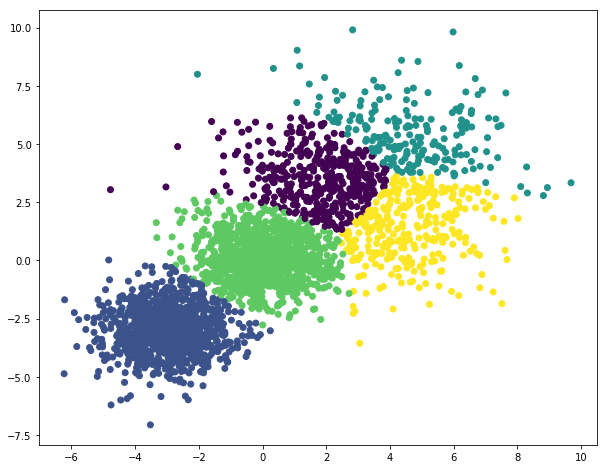

In [19]:
G = GaussianMixture(n_components=clusters,covariance_type='full').fit(model_data)
dataset['clusternumber5'] = G.predict(model_data)

plt.figure (1,figsize=(10,8))
plt.scatter (data_x,data_y, c=dataset['clusternumber5'])

In [21]:
probG = G.predict_proba(model_data)

In [22]:
pd.DataFrame(probG).head()

,0,1,2,3,4
0,0.001513,0.002344,1.870305e-06,0.995845,0.000296
1,0.000545,0.002563,8.648952e-07,0.994924,0.001967
2,0.000124,0.054171,1.349862e-07,0.944949,0.000755
3,0.038238,0.000005,1.434108e-04,0.950707,0.010907
4,0.091938,0.000002,4.158426e-04,0.891563,0.016082


In [ ]:
G.means_

In [ ]:
G.weights_

In [ ]:
G.covariances_

In [23]:
dataset.head()

,data_x,data_y,clusternumber,clusternumber2,clusternumber3,clusternumber4,clusternumber5
0,-1.192130,0.384067,3,2,4,1,3
1,0.209969,-0.932154,3,2,4,1,3
2,-0.402845,-1.416874,3,2,4,1,3
3,0.583390,0.969857,3,2,4,1,3
4,0.566972,1.353123,3,2,4,1,3


In [25]:
dataset.head()

,data_x,data_y,clusternumber,clusternumber2,clusternumber3,clusternumber4,clusternumber5
0,-1.192130,0.384067,3,2,4,1,1
1,0.209969,-0.932154,3,2,4,1,1
2,-0.402845,-1.416874,3,2,4,1,1
3,0.583390,0.969857,3,2,4,1,1
4,0.566972,1.353123,3,2,4,1,1
